### Homework

1. Choose 4 hyperparameters we have learned about in class
2. Create lists of the different options of hyperparameters
3. Randomly sample from those lists and train a Keras model on Fashion - MNIST
4. Display the different loss and accuracy curves using matplotlib
** train at least 10 different models

In [ ]:
from tensorflow import keras
import random
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.layers import Flatten, Dense
import numpy as np
import tensorflow.keras.backend as K
from tensorflow.keras.optimizers import Adam


In [ ]:
# 1. Choose 4 hyperparameters we have learned about in class
# Batch size
# Initialization
# Number of neurons
# Number of layers

In [ ]:
# 2. Create lists of the different options of hyperparameters
batch_sizes_list = (1, 8, 16, 32)
initializers_list = ('random_normal', 'glorot_uniform', 'zeros', 'ones')
number_of_neurons_list = (4, 8, 10, 20)
number_of_layers_list = (2, 4, 6, 8)

In [ ]:
# 3. Randomly sample from those lists and train a Keras model on Fashion - MNIST
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
print("x_train shape:", X_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


In [ ]:
# Normalize data dimensions
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [ ]:
possible_labels = np.unique(y_train)
print(possible_labels)

output_size = possible_labels.size

[0 1 2 3 4 5 6 7 8 9]


In [ ]:
def add_layers(number_of_layers, input, number_of_neurons, initializer):
  next_input = input
  for _ in range(number_of_layers):
    next_input = Dense(
        number_of_neurons, 
        kernel_initializer=initializer, 
        activation='relu'
    )(input)
  return next_input

In [ ]:
def create_model():
  initializer = random.choice(initializers_list)
  number_of_neurons = random.choice(number_of_neurons_list)
  number_of_layers = random.choice(number_of_layers_list)

  print('This model is initialized with', initializer, 'and contains',
        number_of_layers, 'layers, each of which has', number_of_neurons,
        'neurons.')

  input = keras.Input(shape=(28,28))
  flattened_input = Flatten()(input)

  last_layer = add_layers(number_of_layers, flattened_input, number_of_neurons, initializer)
  output = Dense(output_size, activation='softmax')(last_layer)

  functional_model = keras.Model(input, output)
  functional_model.compile(
      loss='sparse_categorical_crossentropy',
      optimizer=Adam(), 
      metrics=['accuracy']
  )
  return functional_model

In [ ]:
def train():
  K.clear_session()
  model = create_model()
  
  batch_size = random.choice(batch_sizes_list)

  print('This model is trained with the batch size', batch_size,
        'for the backpropagation.')
  
  return model.fit(X_train, y_train, batch_size=batch_size, epochs=3, validation_split=0.2)

In [ ]:
# 4. Display the different loss and accuracy curves using matplotlib
def plot(history):
  pd.DataFrame(history.history).plot(figsize=(8,5), ls='-')

  plt.grid(True)
  plt.gca().set_ylim(0,2)
  return plt.show()

This model is initialized with zeros and contains 6 layers, each of which has 20 neurons.
This model is trained with the batch size 8 for the backpropagation.
Epoch 1/3
6000/6000 [==============================] - 8s 1ms/step - loss: 2.3029 - accuracy: 0.1000 - val_loss: 2.3027 - val_accuracy: 0.0983
Epoch 2/3
6000/6000 [==============================] - 9s 1ms/step - loss: 2.3029 - accuracy: 0.0984 - val_loss: 2.3029 - val_accuracy: 0.1003
Epoch 3/3
6000/6000 [==============================] - 8s 1ms/step - loss: 2.3029 - accuracy: 0.0992 - val_loss: 2.3033 - val_accuracy: 0.0983


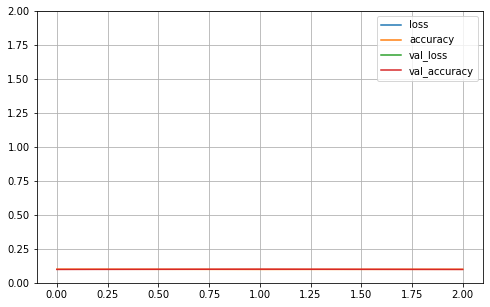

This model is initialized with random_normal and contains 8 layers, each of which has 10 neurons.
This model is trained with the batch size 1 for the backpropagation.
Epoch 1/3
48000/48000 [==============================] - 63s 1ms/step - loss: 1.0122 - accuracy: 0.6464 - val_loss: 0.7114 - val_accuracy: 0.7418
Epoch 2/3
48000/48000 [==============================] - 63s 1ms/step - loss: 0.6531 - accuracy: 0.7606 - val_loss: 0.6120 - val_accuracy: 0.7772
Epoch 3/3
48000/48000 [==============================] - 64s 1ms/step - loss: 0.5815 - accuracy: 0.7887 - val_loss: 0.5648 - val_accuracy: 0.8012


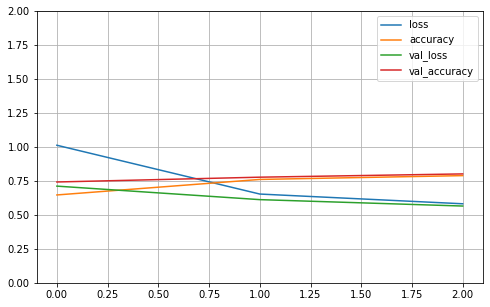

This model is initialized with zeros and contains 4 layers, each of which has 8 neurons.
This model is trained with the batch size 32 for the backpropagation.
Epoch 1/3
1500/1500 [==============================] - 3s 2ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3029 - val_accuracy: 0.0995
Epoch 2/3
1500/1500 [==============================] - 2s 2ms/step - loss: 2.3028 - accuracy: 0.0984 - val_loss: 2.3027 - val_accuracy: 0.1027
Epoch 3/3
1500/1500 [==============================] - 2s 2ms/step - loss: 2.3028 - accuracy: 0.0984 - val_loss: 2.3028 - val_accuracy: 0.0983


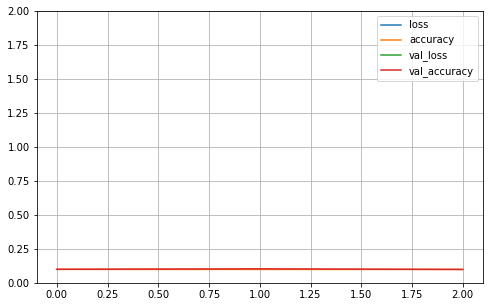

This model is initialized with glorot_uniform and contains 6 layers, each of which has 10 neurons.
This model is trained with the batch size 32 for the backpropagation.
Epoch 1/3
1500/1500 [==============================] - 3s 2ms/step - loss: 1.9629 - accuracy: 0.3266 - val_loss: 1.5869 - val_accuracy: 0.4653
Epoch 2/3
1500/1500 [==============================] - 2s 2ms/step - loss: 1.3928 - accuracy: 0.5353 - val_loss: 1.2363 - val_accuracy: 0.5966
Epoch 3/3
1500/1500 [==============================] - 2s 2ms/step - loss: 1.1489 - accuracy: 0.6064 - val_loss: 1.0596 - val_accuracy: 0.6395


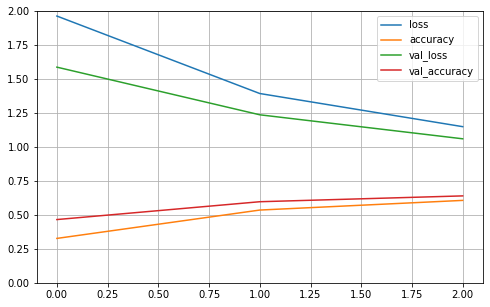

This model is initialized with ones and contains 2 layers, each of which has 10 neurons.
This model is trained with the batch size 16 for the backpropagation.
Epoch 1/3
3000/3000 [==============================] - 5s 2ms/step - loss: 1.6857 - accuracy: 0.4725 - val_loss: 1.1816 - val_accuracy: 0.6587
Epoch 2/3
3000/3000 [==============================] - 5s 2ms/step - loss: 0.9936 - accuracy: 0.6799 - val_loss: 0.8540 - val_accuracy: 0.7197
Epoch 3/3
3000/3000 [==============================] - 5s 2ms/step - loss: 0.7945 - accuracy: 0.7293 - val_loss: 0.7338 - val_accuracy: 0.7481


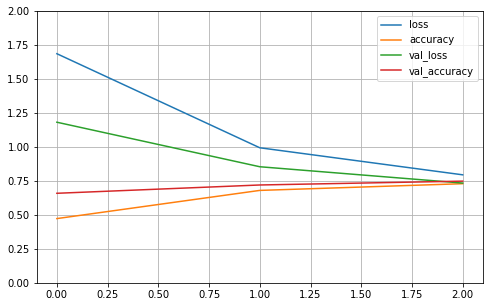

This model is initialized with zeros and contains 2 layers, each of which has 4 neurons.
This model is trained with the batch size 8 for the backpropagation.
Epoch 1/3
6000/6000 [==============================] - 8s 1ms/step - loss: 2.3029 - accuracy: 0.1004 - val_loss: 2.3031 - val_accuracy: 0.1003
Epoch 2/3
6000/6000 [==============================] - 8s 1ms/step - loss: 2.3029 - accuracy: 0.0985 - val_loss: 2.3027 - val_accuracy: 0.1030
Epoch 3/3
6000/6000 [==============================] - 8s 1ms/step - loss: 2.3028 - accuracy: 0.1010 - val_loss: 2.3030 - val_accuracy: 0.1003


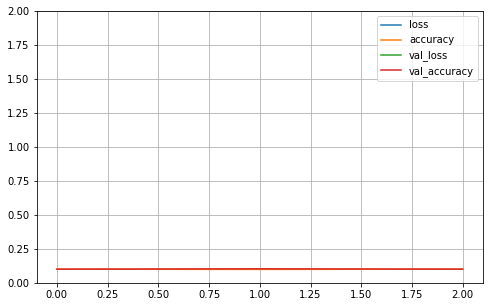

This model is initialized with ones and contains 4 layers, each of which has 4 neurons.
This model is trained with the batch size 1 for the backpropagation.
Epoch 1/3
48000/48000 [==============================] - 60s 1ms/step - loss: 1.1805 - accuracy: 0.5956 - val_loss: 0.7695 - val_accuracy: 0.7147
Epoch 2/3
48000/48000 [==============================] - 60s 1ms/step - loss: 0.7171 - accuracy: 0.7335 - val_loss: 0.6720 - val_accuracy: 0.7493
Epoch 3/3
48000/48000 [==============================] - 60s 1ms/step - loss: 0.6535 - accuracy: 0.7580 - val_loss: 0.6355 - val_accuracy: 0.7612


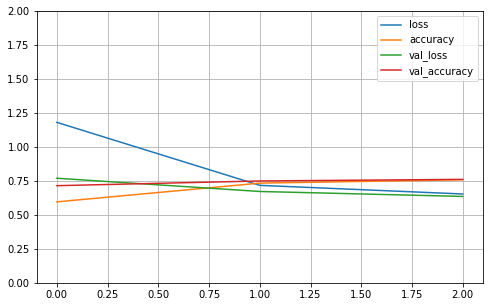

This model is initialized with ones and contains 8 layers, each of which has 8 neurons.
This model is trained with the batch size 8 for the backpropagation.
Epoch 1/3
6000/6000 [==============================] - 9s 1ms/step - loss: 1.5353 - accuracy: 0.5001 - val_loss: 1.0190 - val_accuracy: 0.6670
Epoch 2/3
6000/6000 [==============================] - 8s 1ms/step - loss: 0.8803 - accuracy: 0.7018 - val_loss: 0.7773 - val_accuracy: 0.7122
Epoch 3/3
6000/6000 [==============================] - 9s 1ms/step - loss: 0.7310 - accuracy: 0.7371 - val_loss: 0.6861 - val_accuracy: 0.7463


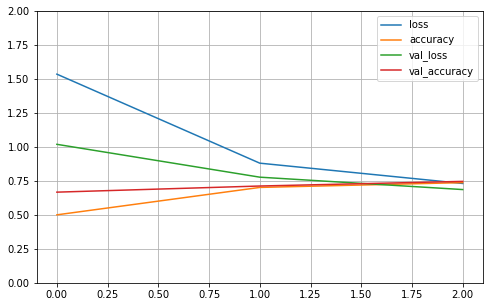

This model is initialized with glorot_uniform and contains 4 layers, each of which has 4 neurons.
This model is trained with the batch size 8 for the backpropagation.
Epoch 1/3
6000/6000 [==============================] - 9s 1ms/step - loss: 1.6927 - accuracy: 0.4291 - val_loss: 1.2526 - val_accuracy: 0.5497
Epoch 2/3
6000/6000 [==============================] - 8s 1ms/step - loss: 1.1216 - accuracy: 0.5714 - val_loss: 1.0195 - val_accuracy: 0.5996
Epoch 3/3
6000/6000 [==============================] - 8s 1ms/step - loss: 0.9767 - accuracy: 0.6376 - val_loss: 0.9185 - val_accuracy: 0.6674


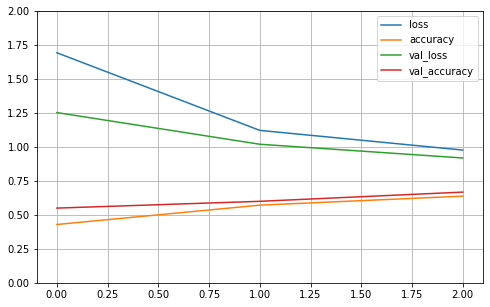

This model is initialized with random_normal and contains 6 layers, each of which has 4 neurons.
This model is trained with the batch size 32 for the backpropagation.
Epoch 1/3
1500/1500 [==============================] - 3s 2ms/step - loss: 2.0499 - accuracy: 0.2356 - val_loss: 1.8065 - val_accuracy: 0.3792
Epoch 2/3
1500/1500 [==============================] - 2s 2ms/step - loss: 1.6174 - accuracy: 0.4429 - val_loss: 1.4596 - val_accuracy: 0.4899
Epoch 3/3
1500/1500 [==============================] - 2s 2ms/step - loss: 1.3544 - accuracy: 0.5106 - val_loss: 1.2639 - val_accuracy: 0.5416


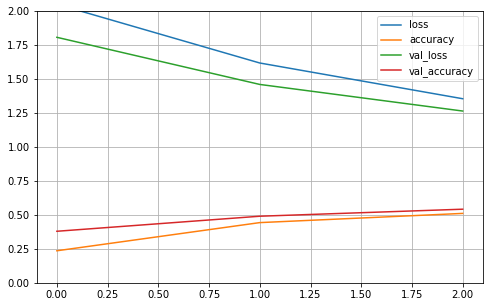

In [ ]:
  # ** train at least 10 different models
  for _ in range(10):
    history = train()
    plot(history)